#Fisherface

In [1]:
import numpy as np
from lib.ReadFiles import read_csv
emotions = ["Marah", "Jijik", "Takut","Senang", "Sedih", "Terkejut", "Biasa saja"]  # inisialisasi index dan emosi

In [2]:
_x, _y, _u = read_csv("input/fer2013_small.csv")
print(np.array(_x).shape)

(3815, 2304)


In [3]:
from lib.FaceDetection import find_faces

x_new, y_new, u_new = [], [], []
for i, pixel in enumerate(_x):
	for norm, (x,y,w,h) in find_faces(np.array(pixel, dtype=np.uint8).reshape(48, 48)):
		if norm.size >0:
			x_new.append(pixel)
			y_new.append(_y[i])
			u_new.append(_u[i])
print(np.array(x_new).shape)

(1868, 2304)


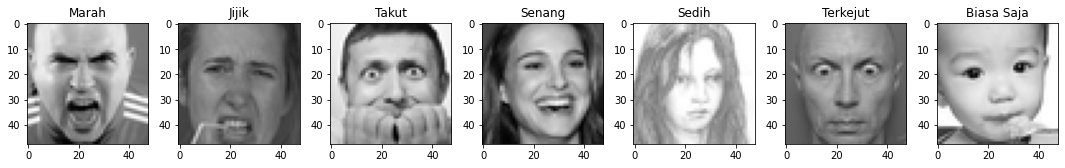

In [4]:
from lib.plot import *

plot_figure(x_new,y_new)

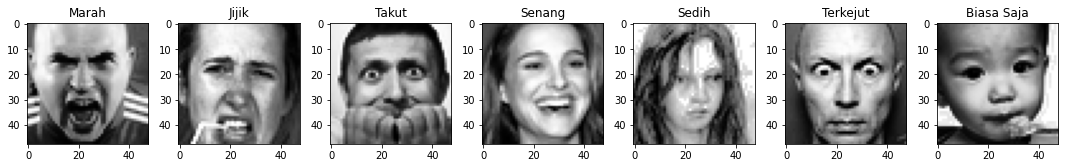

In [5]:
from lib.Prepocessing import *
x_, y_ = image_equalizer(x_new, y_new)
plot_figure(x_, y_)

In [6]:
import pandas as pd
dataframe = pd.DataFrame({"emotion": y_, "pixels": x_, "usage": u_new})
dataframe

,emotion,pixels,usage
0,1,"[[67, 68, 63, 51, 39, 25, 53, 80, 126, 190, 20...",Training
1,4,"[[255, 255, 255, 255, 255, 224, 255, 182, 159,...",Training
2,3,"[[79, 76, 79, 79, 74, 69, 61, 54, 44, 37, 51, ...",Training
3,3,"[[255, 247, 247, 250, 242, 240, 186, 189, 161,...",Training
4,5,"[[94, 94, 102, 102, 102, 102, 105, 68, 132, 16...",Training
...,...,...,...
1863,3,"[[125, 73, 66, 70, 66, 70, 66, 49, 60, 73, 61,...",PrivateTest
1864,1,"[[12, 12, 27, 46, 27, 21, 37, 37, 27, 27, 37, ...",PrivateTest
1865,4,"[[118, 155, 168, 113, 41, 54, 66, 118, 131, 96...",PrivateTest
1866,6,"[[27, 27, 11, 19, 19, 33, 19, 40, 75, 68, 48, ...",PrivateTest


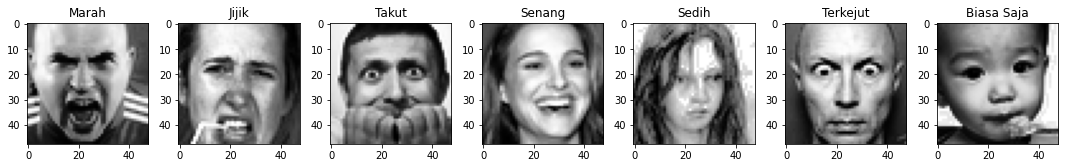

In [7]:
_x_train, _y_train = dataframe.loc[dataframe["usage"] == "Training","pixels"], dataframe.loc[dataframe["usage"] == "Training", "emotion"]

# _x_train, _y_train = dataframe["pixels"], dataframe["emotion"]
def reshape_dataset(X, y):
    images = [np.array(dx) for dx in X]
    images = np.asarray(images, dtype=np.uint8)
    labels = np.array(y).tolist()
    return images, labels

x_train, y_train = reshape_dataset(_x_train, _y_train)
plot_figure(x_train, y_train, "Training_Fisher")

In [8]:
from lib.Fisherface import ModelFisherfaces
import joblib
fisher = ModelFisherfaces(x_train, y_train)

joblib.dump(fisher, "model/fisherface_training.pkl", compress=0)

['model/fisherface_training.pkl']